In [1]:
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv

In [2]:
load_dotenv()

True

In [3]:
openai_model = ChatOpenAI(model="gpt-4o")

In [4]:
openai_model.invoke("hi").content

'Hello! How can I assist you today?'

In [5]:
from langgraph.graph import MessagesState,StateGraph, END, START
from langgraph.graph.message import add_messages
from typing import Annotated , Literal , TypedDict
from langchain_core.tools import tool
from langchain_core.messages import HumanMessage
from langgraph.checkpoint.memory import MemorySaver
from langgraph.prebuilt import ToolNode 

In [6]:
def call_model(state:MessagesState):
    question = state["messages"]
    response=openai_model.invoke(question)
    return {"messages":[response]}

# BASIC WORKFLOW

In [7]:
WorkFlow = StateGraph(MessagesState)

In [8]:
WorkFlow.add_node("chatbot",call_model)

In [9]:
WorkFlow.add_edge(START,"chatbot")

In [10]:
WorkFlow.add_edge("chatbot",END)

In [11]:
app = WorkFlow.compile()

In [12]:
from IPython.display import Image , display

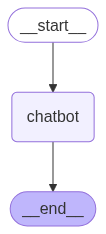

In [13]:
display(Image(app.get_graph().draw_mermaid_png()))

In [14]:
input = {"messages":["hi,My Name is Adarsh"]}
response = app.invoke(input)

In [15]:
response['messages'][-1].content

'Hello, Adarsh! How can I assist you today?'

In [16]:
for output in app.stream(input):
    for key,value in output.items():
        print(f"output from {key} Node")
        print("________")
        print(value)
        print("\n")

output from chatbot Node
________
{'messages': [AIMessage(content='Hello Adarsh! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 12, 'prompt_tokens': 15, 'total_tokens': 27, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_07871e2ad8', 'id': 'chatcmpl-BgUv5so2pyuleQlJ70tVngqWyvFnc', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--9f6c40ff-aed8-4e86-90ca-ac3f0379e55b-0', usage_metadata={'input_tokens': 15, 'output_tokens': 12, 'total_tokens': 27, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}




In [17]:
for output in app.stream(input):
    print(output)

{'chatbot': {'messages': [AIMessage(content='Hello, Adarsh! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 13, 'prompt_tokens': 15, 'total_tokens': 28, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_07871e2ad8', 'id': 'chatcmpl-BgUv6TdGEar6yCH4dLqgXA28BGtux', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--5db4bd3c-8894-4563-a91e-590b2686f499-0', usage_metadata={'input_tokens': 15, 'output_tokens': 13, 'total_tokens': 28, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]}}


In [18]:
@tool
def search(query:str):
    """
    this is a tool for weather checking
    """
    if "india" in query.lower() or "delhi" in query.lower():
        return "the weather is hotty with some foggy"
    return "weather is cludy with some darkness"

In [19]:
search.invoke("what is weather in japan?")

'weather is cludy with some darkness'

In [20]:
search.invoke("what is weather in india?")

'the weather is hotty with some foggy'

In [21]:
tools=[search]

In [22]:
llm_with_tool = openai_model.bind_tools(tools)

In [23]:
llm_with_tool.invoke("hi")

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 45, 'total_tokens': 55, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_a288987b44', 'id': 'chatcmpl-BgUv8kZABX7NJcRTbzXQi3h6UGWEr', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--f62ad265-3d8b-4858-ba41-b16af69eb625-0', usage_metadata={'input_tokens': 45, 'output_tokens': 10, 'total_tokens': 55, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [24]:
response = llm_with_tool.invoke("Whats the weather in europe")

In [25]:
response.content

''

In [26]:
response.tool_calls

[{'name': 'search',
  'args': {'query': 'weather in Europe'},
  'id': 'call_miHMN7th9VzNYQdpNO20nkAv',
  'type': 'tool_call'}]

In [27]:
def call_model(state:MessagesState):
    question = state["messages"]
    response=llm_with_tool.invoke(question)
    return {"messages":[response]}

In [28]:
input = {'messages':["Whats the weather in europe"]}

In [29]:
response = call_model(input)

In [30]:
message = response["messages"]
message

[AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_hHPK8uArHvn47ii7Nn6dSLE5', 'function': {'arguments': '{"query":"current weather in Europe"}', 'name': 'search'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 49, 'total_tokens': 65, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_a288987b44', 'id': 'chatcmpl-BgUv95bbcq3FvRkwdrfOj9JlOaZkp', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--256915d9-3d96-499d-9d91-e3d2ee79617a-0', tool_calls=[{'name': 'search', 'args': {'query': 'current weather in Europe'}, 'id': 'call_hHPK8uArHvn47ii7Nn6dSLE5', 'type': 'tool_call'}], usage_metadata={'input_tokens': 49, 'output_tokens': 16, 'total_tokens': 65, 'in

In [31]:
last_message = message[-1]
last_message.content

''

In [32]:
last_message.tool_calls

[{'name': 'search',
  'args': {'query': 'current weather in Europe'},
  'id': 'call_hHPK8uArHvn47ii7Nn6dSLE5',
  'type': 'tool_call'}]

In [33]:
#now we need to orchestrate the tool call using lang graph

def router_function(state:MessagesState):
    message = state["messages"]
    last_message = message[-1]
    if last_message.tool_calls:
        return "tools"
    return END

In [34]:
tool_node = ToolNode(tools)

In [35]:
WorkFlow = StateGraph(MessagesState)

In [36]:
WorkFlow.add_node("assist",call_model)
WorkFlow.add_node("myweathertool",tool_node)

In [37]:
WorkFlow.add_edge(START,"assist")
WorkFlow.add_conditional_edges("assist",router_function,{"tools":"myweathertool",END:END})

app = WorkFlow.compile()

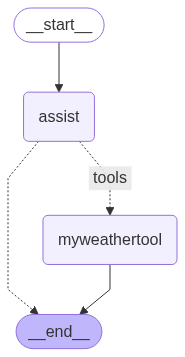

In [38]:
display(Image(app.get_graph().draw_mermaid_png()))

In [39]:
app.invoke({"messages":["Hi! What is the weather in India?"]})

{'messages': [HumanMessage(content='Hi! What is the weather in India?', additional_kwargs={}, response_metadata={}, id='980aeebc-2697-4679-9225-965aa48a779f'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_CLlbIBHTEsaxGFIGejc2Upa3', 'function': {'arguments': '{"query":"current weather in India"}', 'name': 'search'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 53, 'total_tokens': 69, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_a288987b44', 'id': 'chatcmpl-BgUvA7qTvjLudjepEewMOcGZ66NNR', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--806d2f03-7201-4947-a1a0-c315c20a43b4-0', tool_calls=[{'name': 'search', 'args': {'query': 'current wea

In [40]:
from langchain_core.messages import HumanMessage , SystemMessage 

In [41]:
sys_msg = SystemMessage(content="You are a helpful assistant that answers questions about the weather in India and Japan.") 

In [42]:
def assitant(state:MessagesState):
    return {"messages":[llm_with_tool.invoke([sys_msg]+state["messages"])]}

In [43]:
builder = StateGraph(MessagesState)

In [44]:
builder.add_node("assit",assitant)

In [45]:
builder.add_node("tools",ToolNode(tools))

In [46]:
builder.add_edge(START,"assit")


In [47]:
from langgraph.prebuilt import tools_condition

In [48]:
builder.add_conditional_edges(
    "assit",
    tools_condition
)

In [49]:
builder.add_edge("tools","assit")

In [50]:
ReAct = builder.compile()

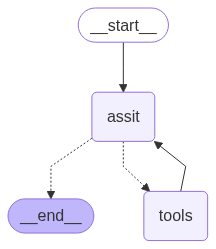

In [51]:
display(Image(ReAct.get_graph().draw_mermaid_png()))

In [52]:
messages = [HumanMessage(content="what is weather in austria")]

In [53]:
response = ReAct.invoke({"messages":messages})

In [54]:
for m in response["messages"]:
    m.pretty_print()

================================ Human Message =================================

what is weather in austria
================================== Ai Message ==================================

I am designed to provide weather information specifically for India and Japan. You might want to check a global weather service for the weather in Austria.
